<a href="https://colab.research.google.com/github/ubsuny/PHY386/blob/Homework2025/2025/HW/drewalessi/HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import libraries
!pip install qutip
import qutip
import numpy as np
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.1/30.1 MB 18.9 MB/s eta 0:00:00


Exercise 1 - Debugging Type Errors

In [3]:
def photon_count(state: qutip.Qobj) -> complex:
    """
    Computes the expectation value of the photon number operator ⟨n⟩.

    Parameters:
        state (qutip.Qobj): Quantum state.

    Returns:
        complex: Photon number expectation value.
    """
    return qutip.expect(qutip.num(10), state)  # Returns float!

In [4]:
photon_count(qutip.coherent(10, 1))

0.9999999259365113

In [5]:
def create_fock_state(n: int, dims: int) -> qutip.Qobj:
    """
    Type enforcement prevents:
    create_fock_state(2.5, 10)  # Error: n must be integer!
    """
    return qutip.fock(dims, n)

In [6]:
create_fock_state(2, 10)

Quantum object: dims=[[10], [1]], shape=(10, 1), type='ket', dtype=Dense
Qobj data =
[[0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]

In [7]:
def create_coherent_state(alpha: float, dimension: int) -> qutip.Qobj:
    """
    Creates a coherent state |α⟩ using QuTiP.

    Parameters:
        alpha (complex): Complex displacement parameter.
        dimension (int): Hilbert space size.

    Returns:
        qutip.Qobj: The coherent state |α⟩.
    """
    return qutip.coherent(dimension, alpha) # Docstring for .coherent says alpha can be float/complex, but parameter only takes float

In [8]:
create_coherent_state(1, 10)

Quantum object: dims=[[10], [1]], shape=(10, 1), type='ket', dtype=Dense
Qobj data =
[[0.60653066]
 [0.60653066]
 [0.42888194]
 [0.24761511]
 [0.12380753]
 [0.0553686 ]
 [0.02260303]
 [0.00854887]
 [0.00299672]
 [0.00110007]]

In [9]:
def photon_number_expectation(state: qutip.Qobj) -> complex:
    """
    Computes the expectation value of the photon number operator ⟨n⟩.

    Parameters:
        state (qutip.Qobj): Quantum state.

    Returns:
        complex: Photon number expectation value.
    """
    return qutip.expect(qutip.num(state.shape[0]), state)

Exercise 2: Quantum States in QuTiP

Exercise 2.1: Creating Fock States

[Text(0, 0, '1'), Text(0, 0, '1'), Text(0, 0, '1')]

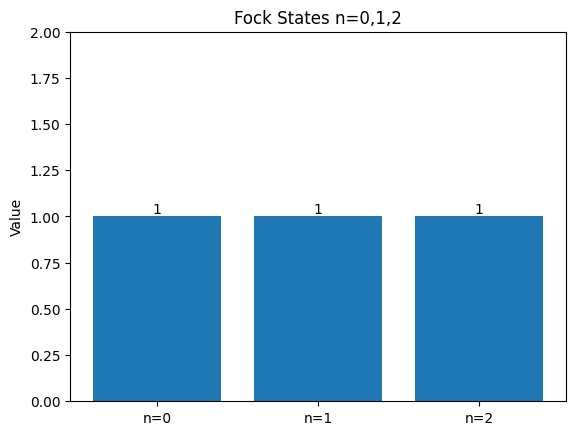

In [10]:
# Create fock states
f0 = qutip.fock(3, 0)
f1 = qutip.fock(3, 1)
f2 = qutip.fock(3, 2)

# Plot fock state wavefunction in bar graph
fock_states = ['n=0', 'n=1', 'n=2']
wavefunction = [(np.abs(f0.full().flatten()[0])**2), (np.abs(f1.full().flatten()[1])**2), (np.abs(f2.full().flatten()[2])**2)]

fig, ax = plt.subplots()
bar_container = ax.bar(fock_states, wavefunction, width=0.8)
ax.set(ylabel='Value', title='Fock States n=0,1,2', ylim=(0, 2))
ax.bar_label(bar_container, fmt='{:,.0f}')

Exercise 2.2: Creating Coherent States

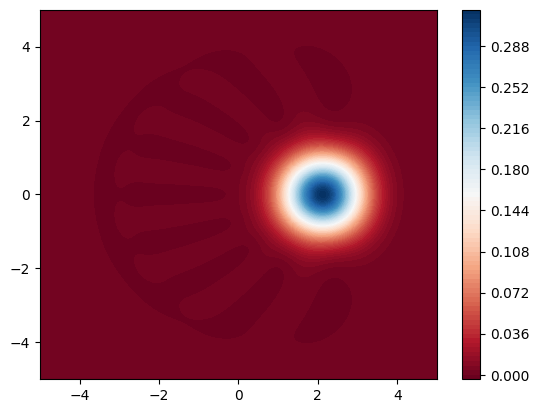

In [11]:
# Plot Wigner function
coherent_state = qutip.coherent(10, 1.5) #coherent state with alpha = 1.5
x = np.linspace(-5, 5, 200)
y = np.linspace(-5, 5, 200)
X, Y = np.meshgrid(x, y)
Z = qutip.wigner(coherent_state, x, y)
plt.contourf(X, Y, Z, 100, cmap='RdBu')
plt.colorbar()
plt.show()

Exercise 2.3: Creating Squeezed Vacuum States

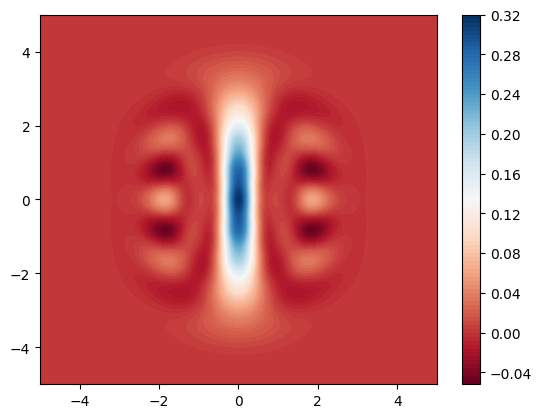

In [12]:
vac = qutip.fock(10,0) #create vacuum state
squee = qutip.squeeze(10,1) #create squeeze operator

new = squee*vac # apply squeeze operator to vacuum state

# Plot resulting state
x = np.linspace(-5, 5, 200)
y = np.linspace(-5, 5, 200)
X, Y = np.meshgrid(x, y)
Z = qutip.wigner(new, x, y)
plt.contourf(X, Y, Z, 100, cmap='RdBu')
plt.colorbar()
plt.show()

Exercise 3: Interactive Quantum Circuit Prompt

In [13]:
!pip install strawberryfields
import strawberryfields as sf
from strawberryfields.ops import Sgate, BSgate, MeasureHomodyne
import matplotlib.pyplot as plt
from typing import List

# Define the number of modes and squeezing parameter
modes: int = 2
squeezing_param: float = 0.5  # Updated squeezing parameter

# Initialize a Strawberry Fields program with the specified number of modes
prog = sf.Program(modes)

# Define the quantum circuit
with prog.context as q:
    # Apply squeezing to both modes
    Sgate(squeezing_param) | q[0]
    Sgate(squeezing_param) | q[1]

    # Apply a 50:50 beamsplitter to create entanglement
    BSgate(0.5 * sf.math.pi, 0) | (q[0], q[1])

    # Perform homodyne detection on both modes (measure quadrature x)
    MeasureHomodyne(0) | q[0]
    MeasureHomodyne(0) | q[1]

# Run the simulation using the Gaussian backend
eng = sf.Engine("gaussian")
results = eng.run(prog)

# Extract measurement results
measurements: List[float] = results.samples

# Print measurement results
print("Homodyne measurement results:", measurements)

# Visualize the output state (covariance matrix)
cov_matrix = results.state.cov()
plt.imshow(cov_matrix, cmap="viridis", interpolation="none")
plt.colorbar(label="Covariance")
plt.title("Covariance Matrix of Output State")
plt.xlabel("Quadrature Index")
plt.ylabel("Quadrature Index")
plt.show()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 9.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.0/48.0 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.7/94.7 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.5/103.5 kB 11.2 MB/s eta 0:00:00
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.9.2-py3-none-any.whl size=144544 sha256=228a08e52729adbb51a05821f51df14515e42e280f2f342bc9f0a3bfc15964d1
  Stored in directory: /root/.cache/pip/wheels/02/5e/de/90c5aab11b66f94cf3f381ec55aaf3f2008213a7056310e25f
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=df84dc2637c55477e356ce82a91fa120ecc11a39d1b2bfc21ac827bc83208fba
  Sto

ImportError: cannot import name 'simps' from 'scipy.integrate' (/usr/local/lib/python3.11/dist-packages/scipy/integrate/__init__.py)

I was unable to run the above code to verify whether it works or what the results will be. I implemented the suggested fix, which corrected the problem with scipy, but created a compatibility issue with matplotlib, which then caused problems with the code from earlier sections as well. I chose to revert to the original python version so that part of the code works, but was unable to get the strawberry fields portion to function.

Modify and Improve the Prompt

I want to design a quantum photonic circuit using Strawberry Fields in Python. Please guide me step by step by asking interactive questions to define the circuit based on my requirements. Here’s how I’d like you to proceed:

1. Ask me what type of quantum problem I want to solve (e.g., quantum teleportation, Gaussian boson sampling, entanglement generation).
2. Help me choose the number of modes and photon states required for the circuit.
3. Assist me in selecting quantum operations (e.g., squeezing, displacement, beamsplitters, phase shifts, Kerr interaction).
4. Guide me in setting up appropriate measurements (e.g., homodyne, photon counting, heterodyne).
5. Once all parameters are determined, generate the complete Strawberry Fields Python code for the circuit. Be sure to include type annotations in the code where appropriate. Check the code for errors before showing the final result.
6. Include a section to visualize the output state or measurement results using Matplotlib or QuTiP.

Please guide me interactively through each step, one step at a time, ensuring that I understand the choices and their implications. Please ensure all options presented at each step are appropriate for the physical system we are creating.After the final code is generated, provide a detailed and coherent explanation of its functionality.

The AI (Perplexity) did a pretty good job of walking through the decisions, step by step, although in one iteration it just presented all the options at once up front. In particular, it was helpful in explaining which choices were commonly used for different tasks and would be a good fit for the task at hand. Since I was unable to execute the code successfully, I'm still not sure if the final code actually achieves what it set out to do. The AI was not very helpful in working around the compatibility issues related to different versions of libraries, etc.